In [35]:
import numpy as np
import pandas as pd

# Full Transition matrix P including absorbing state C
P = np.array([
    [1, 0, 0, 0, 0, 0, 0],  # C (Absorbing state)
    [0.2451, 0, 0.7397, 0, 0, 0.0152, 0],  # U0
    [0.1454, 0, 0, 0.8404, 0, 0, 0.0142],  # U1
    [0.0588, 0, 0, 0.9278, 0, 0, 0.0134],  # U2
    [0.1429, 0, 0, 0, 0, 0.8571, 0],  # I0
    [0.1667, 0, 0, 0, 0, 0, 0.8333],  # I1
    [0.0372, 0, 0, 0.0433, 0, 0, 0.9195]  # I2
])
# Corrected variable names and DataFrame creation
transition_matrix_df = pd.DataFrame(P, columns=["C", "U0", "U1", "U2", "I0", "I1", "I2"], index=["C", "U0", "U1", "U2", "I0", "I1", "I2"])

# Extract Q (transition matrix for transient states)
Q = P_full[1:, 1:]
transient_matrix_df = pd.DataFrame(Q, columns=["U0", "U1", "U2", "I0", "I1", "I2"], index=["U0", "U1", "U2", "I0", "I1", "I2"])

# Identity matrix of size Q
I = np.eye(Q.shape[0])

# Fundamental matrix N = (I - Q)^(-1)
N = np.linalg.inv(I - Q)
fundamental_matrix_df = pd.DataFrame(N, columns=["U0", "U1", "U2", "I0", "I1", "I2"], index=["U0", "U1", "U2", "I0", "I1", "I2"])

# Expected time in each transient state before reaching absorption
expected_time = np.sum(N, axis=1)

# Compute U matrix (sum of rows of N)
U = N @ np.ones((N.shape[1], 1))

# Initial distribution of subscribers
pi_T_0 = np.array([0.2083, 0.1274, 0.5070, 0.0032, 0.0081, 0.1460])

# Compute overall expected subscription length
average_subscription_length = np.dot(pi_T_0, expected_time)

# Print results
print("Transition Matrix P (including absorbing state C):")
print(transition_matrix_df.to_string(float_format="{:.4f}".format))

print("\nTransient State Matrix Q:")
print(transient_matrix_df.to_string(float_format="{:.4f}".format))

print("\nFundamental Matrix N:")
print(fundamental_matrix_df.to_string(float_format="{:.4f}".format))

print("\nExpected time in each transient state before cancellation:")
for i, time in enumerate(expected_time):
    print(f"State {i+1} (U0, U1, U2, I0, I1, I2)[{i+1}]: {time:.2f} years")

print("\nU Matrix:")
print(U)

print("\nInitial Distribution pi(T):")
print(pi_T_0)

print("\nOverall average subscription length:", round(average_subscription_length, 2), "years")

Transition Matrix P (including absorbing state C):
        C     U0     U1     U2     I0     I1     I2
C  1.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000
U0 0.2451 0.0000 0.7397 0.0000 0.0000 0.0152 0.0000
U1 0.1454 0.0000 0.0000 0.8404 0.0000 0.0000 0.0142
U2 0.0588 0.0000 0.0000 0.9278 0.0000 0.0000 0.0134
I0 0.1429 0.0000 0.0000 0.0000 0.0000 0.8571 0.0000
I1 0.1667 0.0000 0.0000 0.0000 0.0000 0.0000 0.8333
I2 0.0372 0.0000 0.0000 0.0433 0.0000 0.0000 0.9195

Transient State Matrix Q:
       U0     U1     U2     I0     I1     I2
U0 0.0000 0.7397 0.0000 0.0000 0.0152 0.0000
U1 0.0000 0.0000 0.8404 0.0000 0.0000 0.0142
U2 0.0000 0.0000 0.9278 0.0000 0.0000 0.0134
I0 0.0000 0.0000 0.0000 0.0000 0.8571 0.0000
I1 0.0000 0.0000 0.0000 0.0000 0.0000 0.8333
I2 0.0000 0.0000 0.0433 0.0000 0.0000 0.9195

Fundamental Matrix N:
       U0     U1      U2     I0     I1      I2
U0 1.0000 0.7397  9.7566 0.0000 0.0152  1.9119
U1 0.0000 1.0000 13.0483 0.0000 0.0000  2.3484
U2 0.0000 0.0000 15.3864 0.

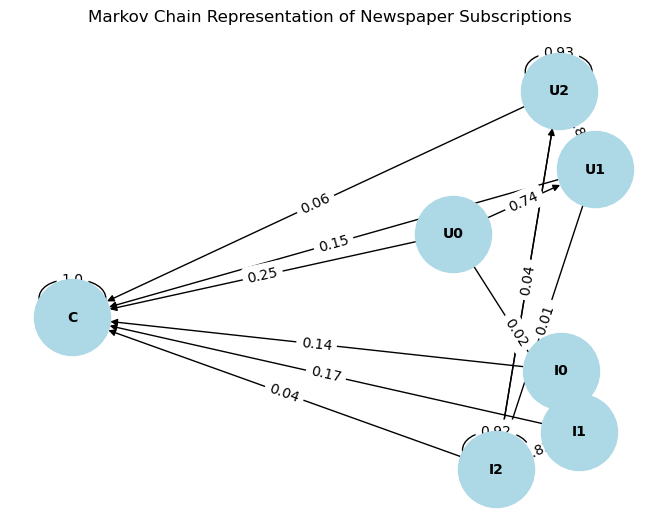

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

# Graph representation of the Markov process
def plot_markov_chain(P):
    states = ["C", "U0", "U1", "U2", "I0", "I1", "I2"]
    G = nx.DiGraph()
    
    for i in range(len(states)):
        for j in range(len(states)):
            if P[i, j] > 0:  # Only plot transitions with non-zero probability
                G.add_edge(states[i], states[j], weight=round(P[i, j], 2))
    
    pos = nx.spring_layout(G)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.title("Markov Chain Representation of Newspaper Subscriptions")
    plt.show()

# Plot the Markov chain
to_plot = P_full.copy()
plot_markov_chain(to_plot)